In [32]:
# Import nessecary libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)


There are 7 features we need to compare with the outcome.

* Sulphur Dioxide

* Carbon Monoxide

* Nitrogen Dioxide

* Formaldehyde

* UV Aerosol Index

* Ozone

* Cloud

In [3]:
df = pd.read_csv(r'dataset\CO2 Emmisions in Rawanda\train.csv')
df

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,ID_-3.299_30.301_2021_48,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
79019,ID_-3.299_30.301_2021_49,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
79020,ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205
79021,ID_-3.299_30.301_2021_51,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,...,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792


In [16]:
# Plot Year over Year growth by month

# Get a subset of the original database to check the year-on-year growth
year_week_df = df[['year',"week_no",'emission']]

# Print to check them
print(year_week_df.dtypes)

year          int64
week_no       int64
emission    float64
dtype: object


C:\Users\SameerAhamed\AppData\Local\Temp\ipykernel_7816\276279400.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


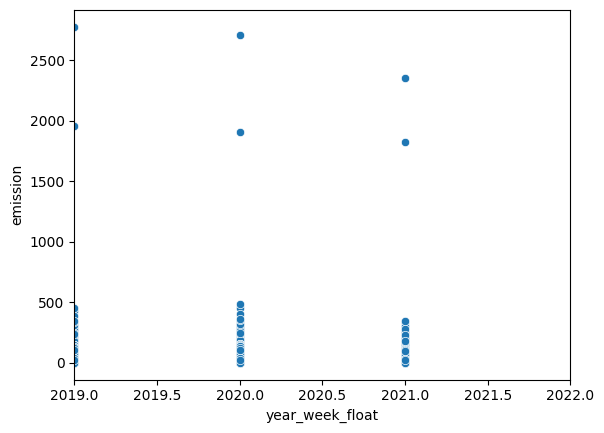

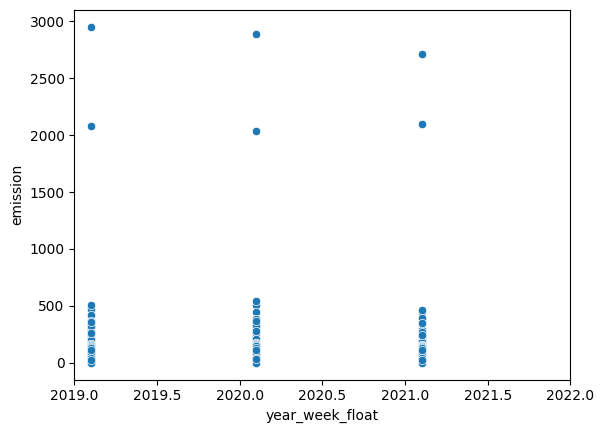

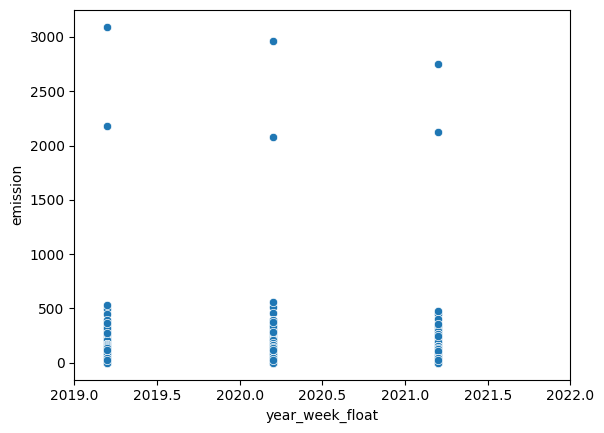

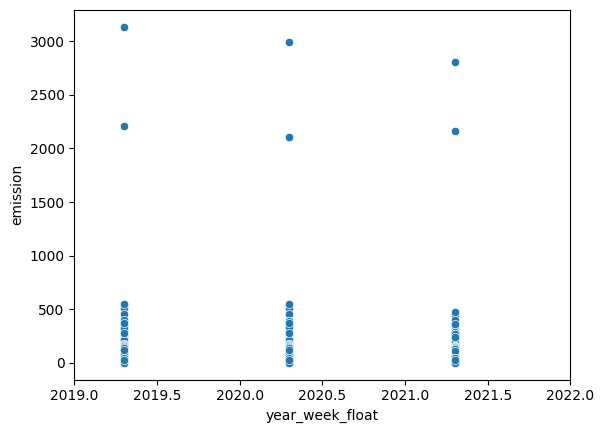

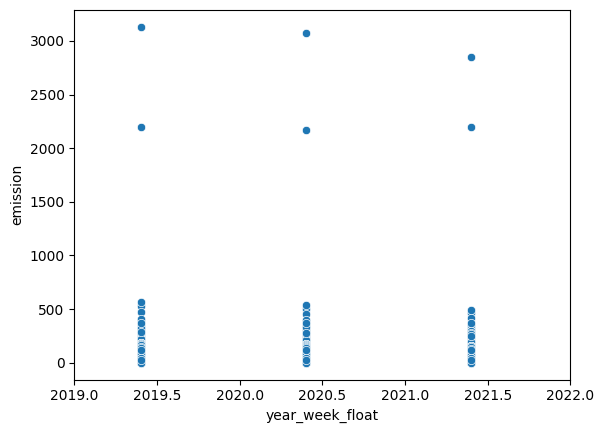

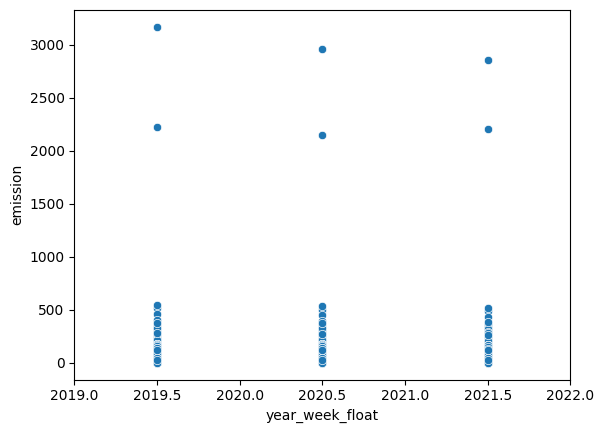

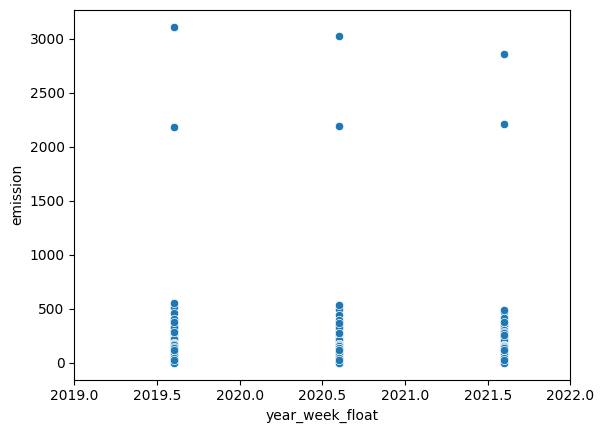

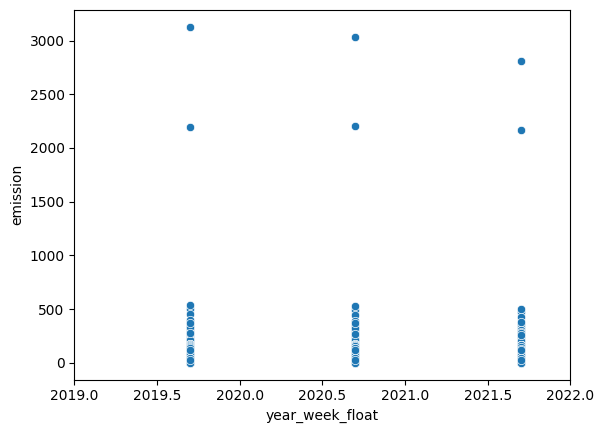

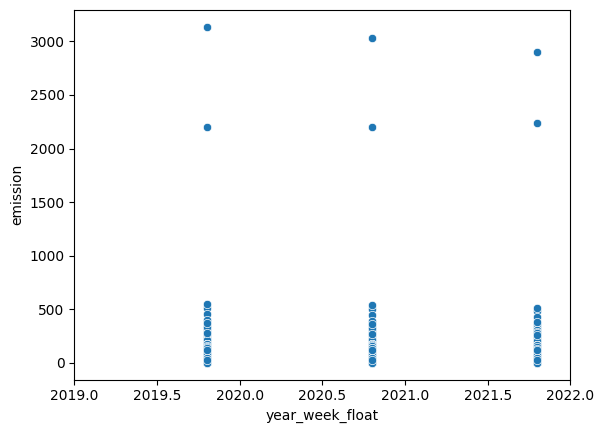

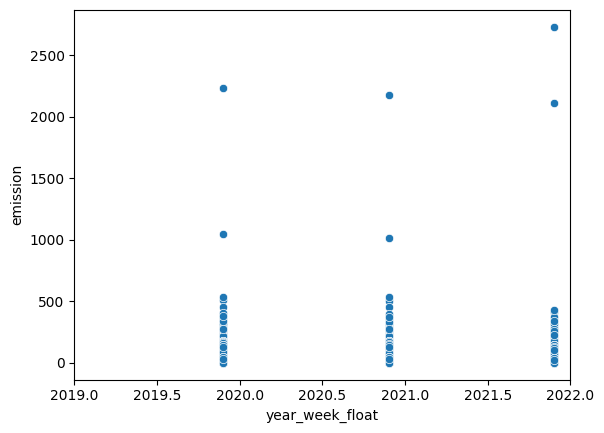

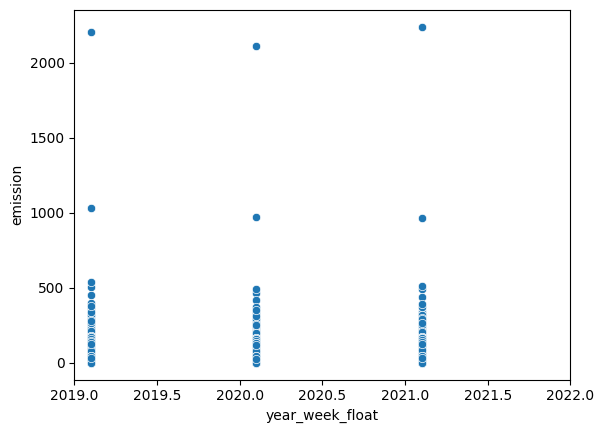

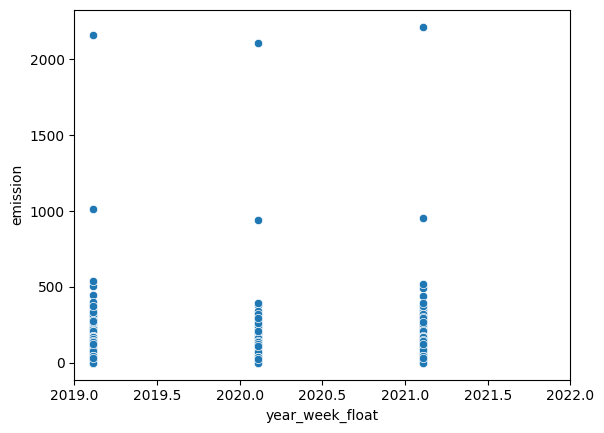

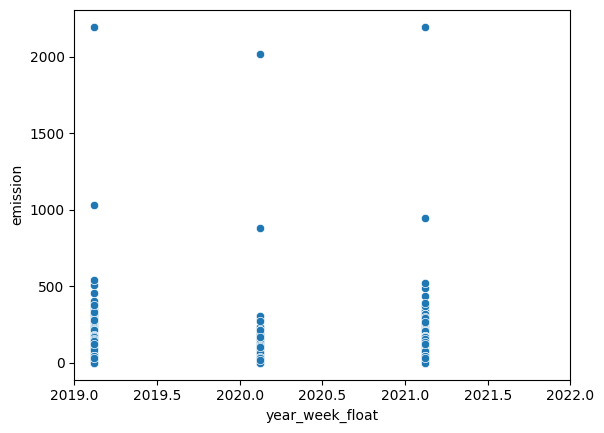

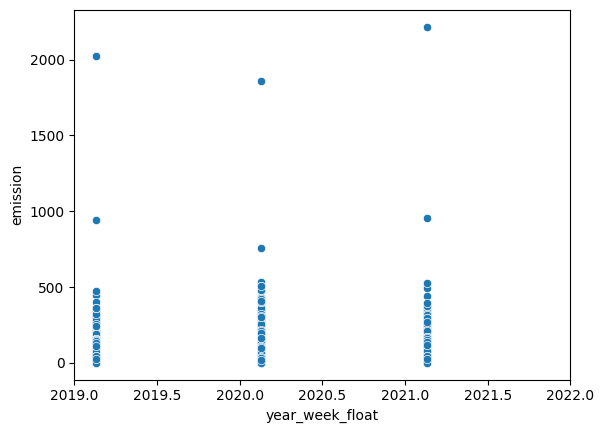

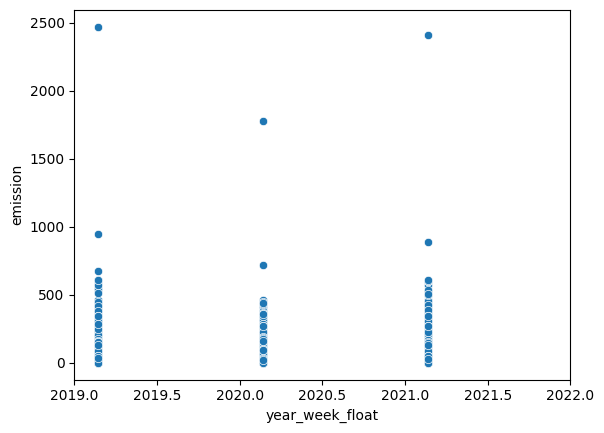

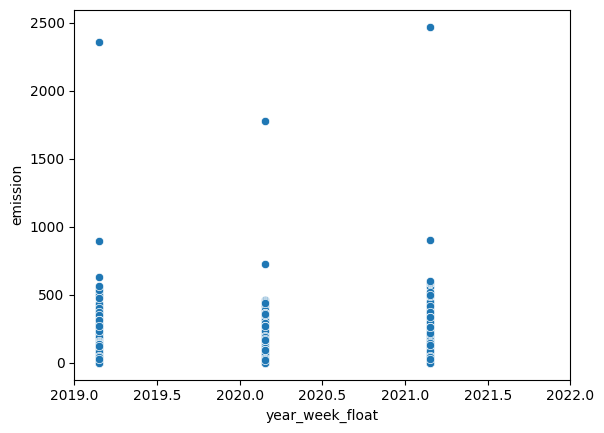

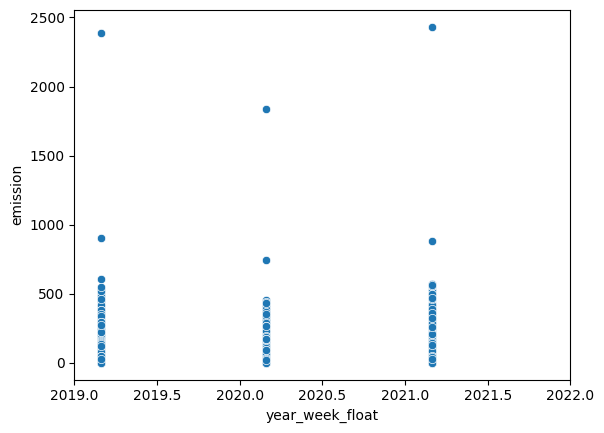

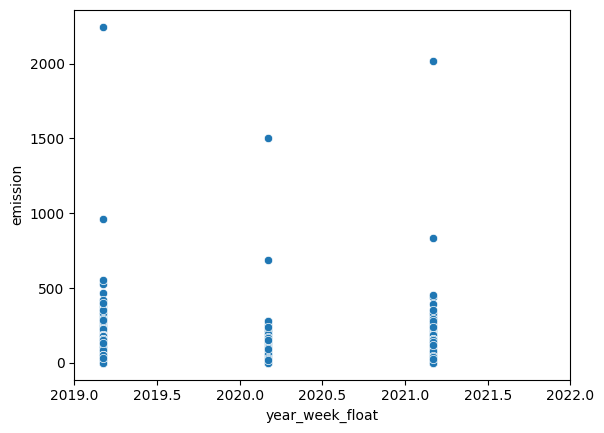

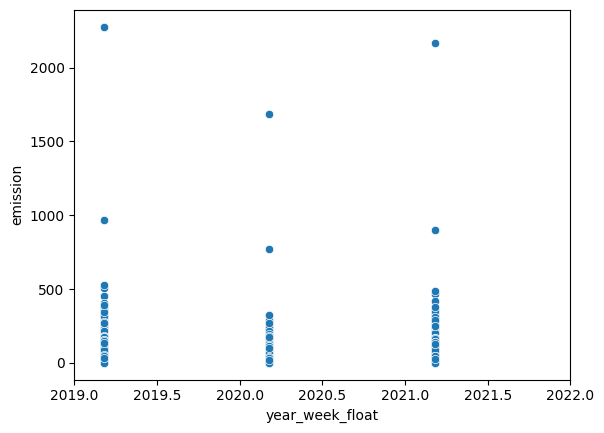

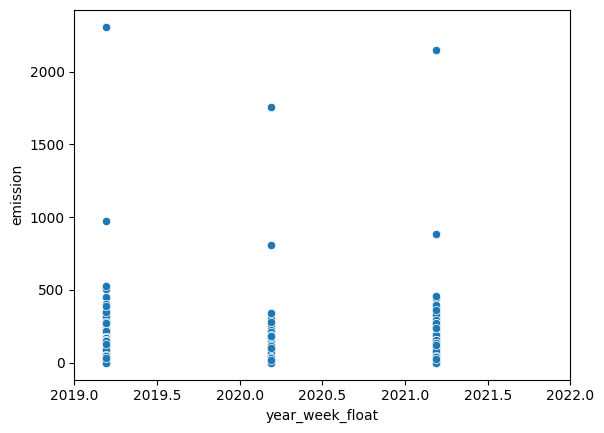

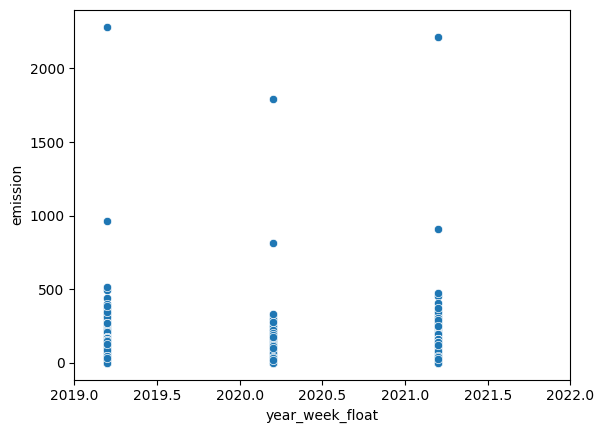

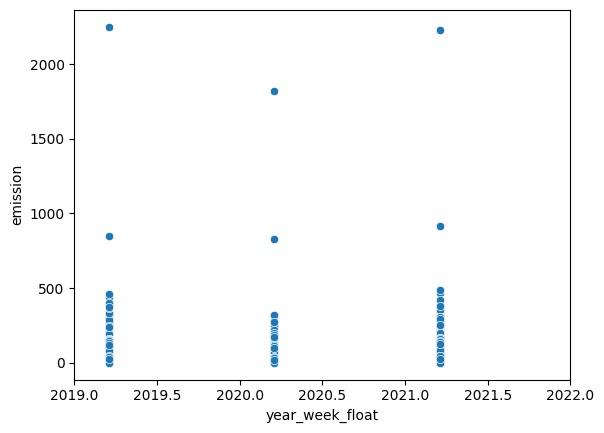

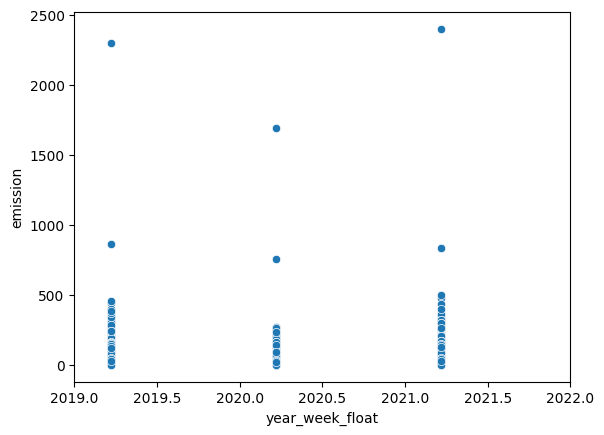

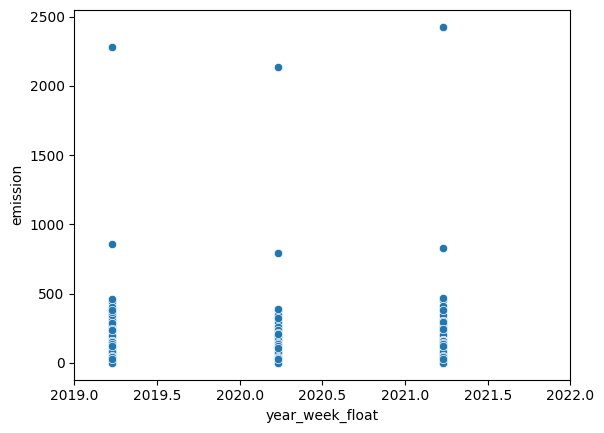

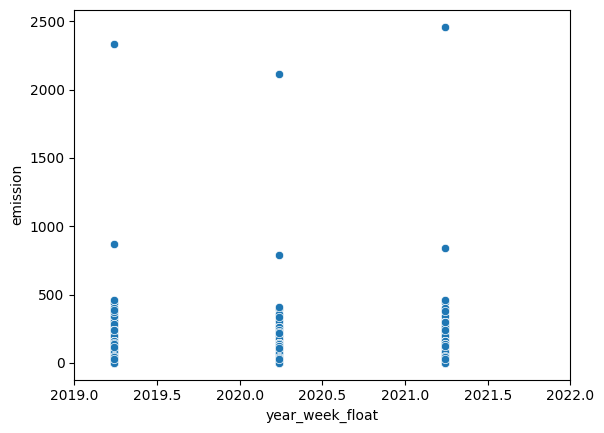

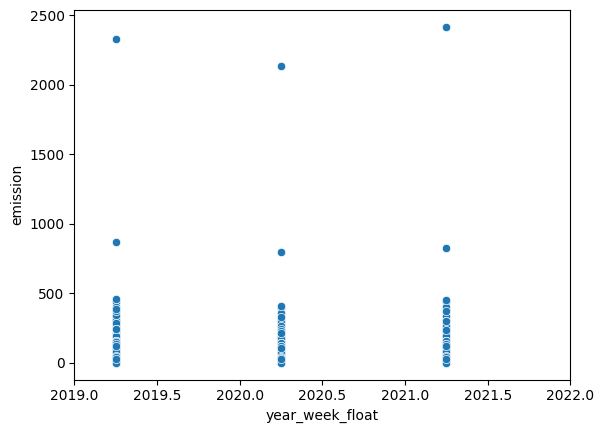

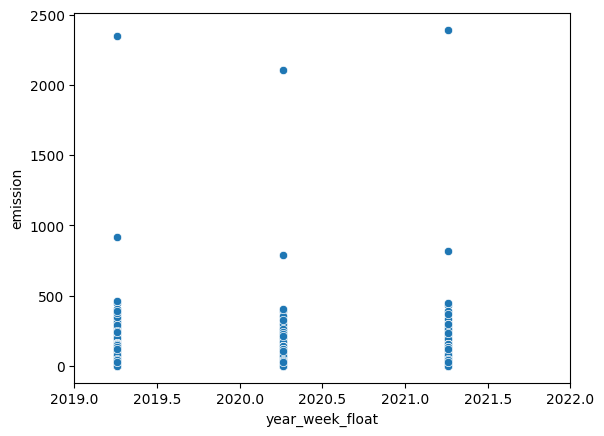

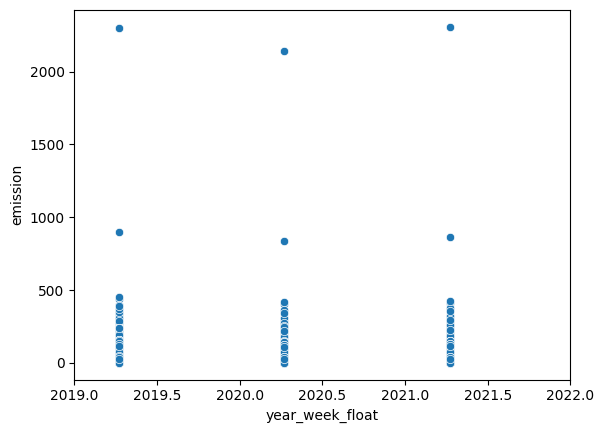

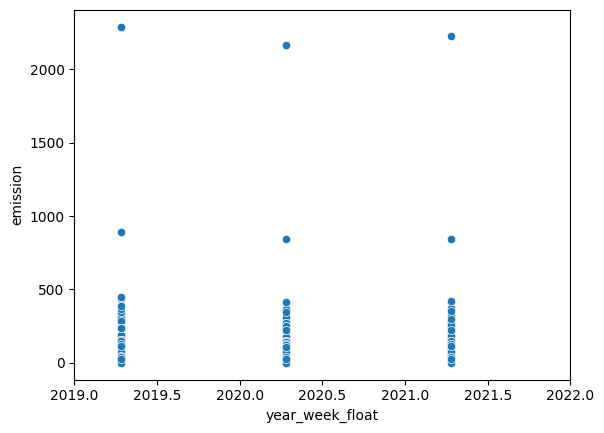

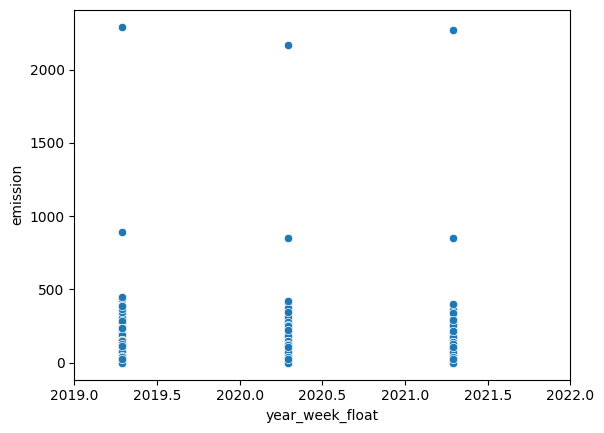

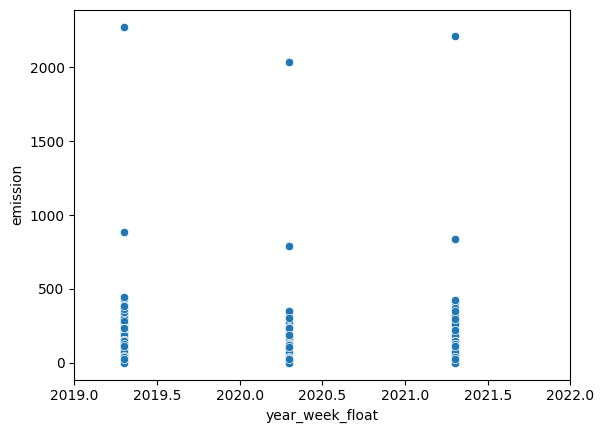

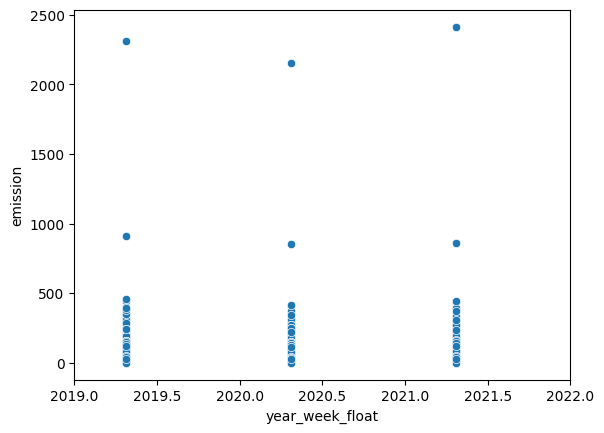

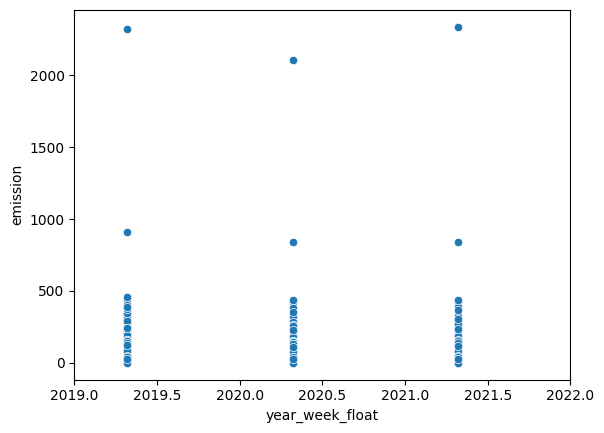

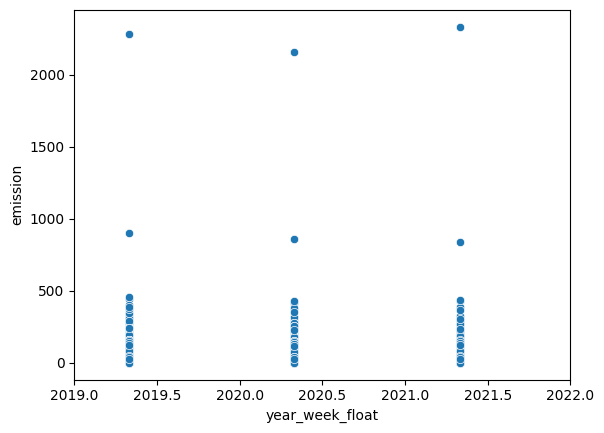

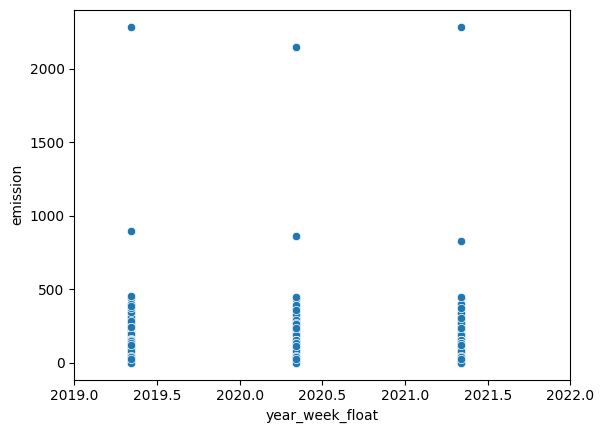

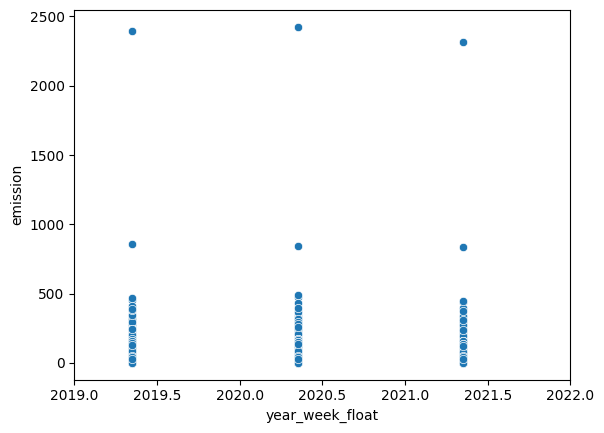

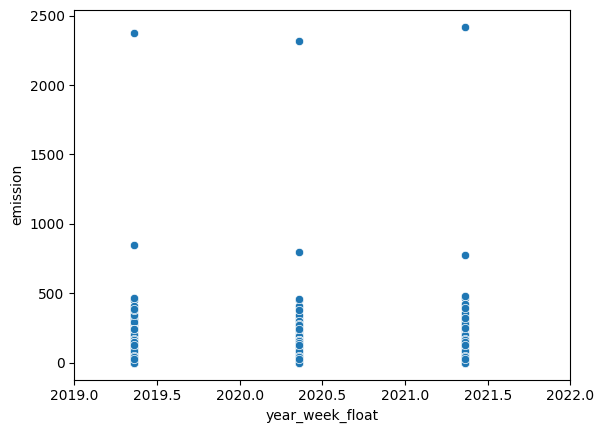

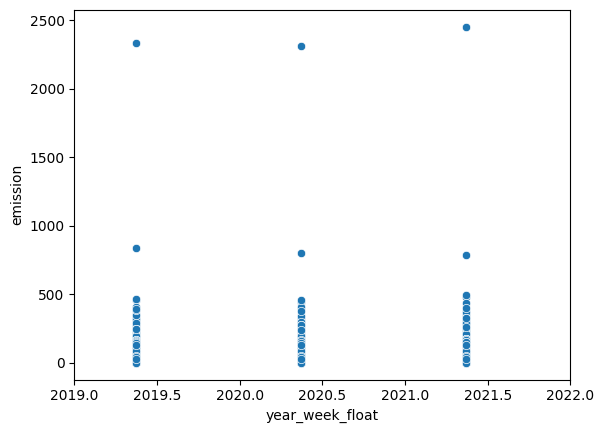

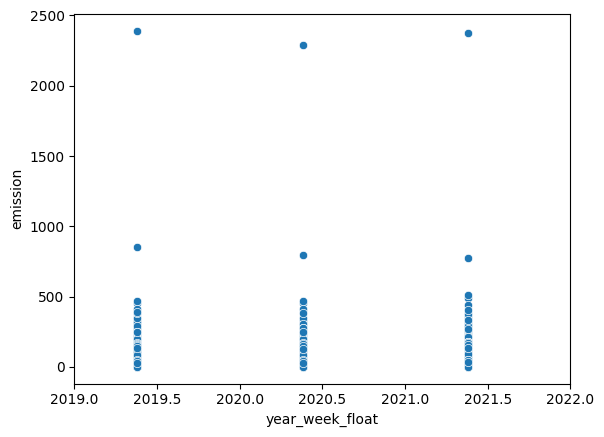

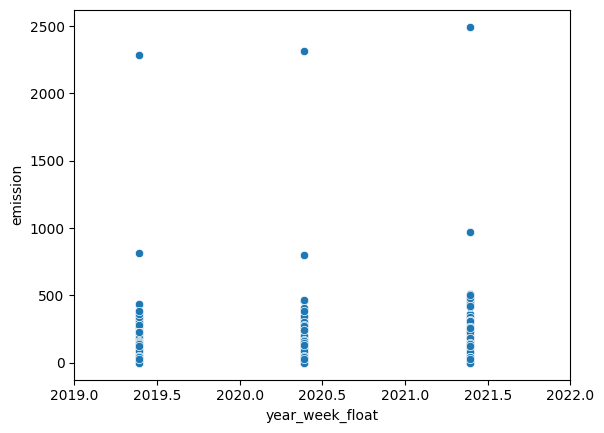

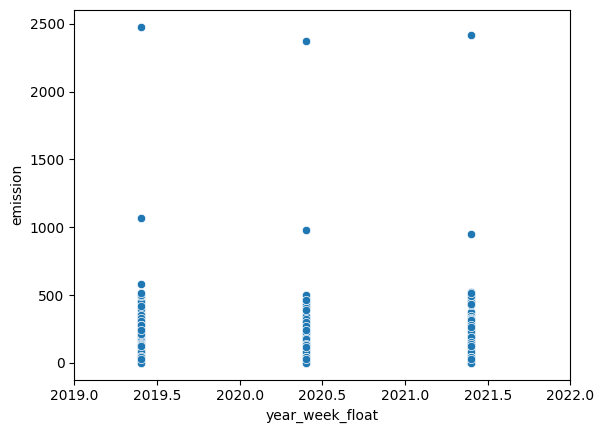

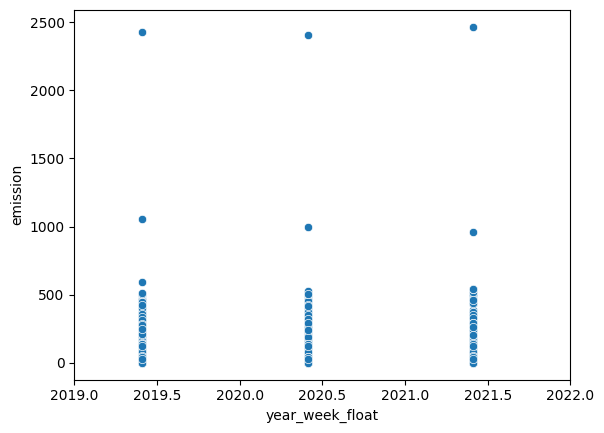

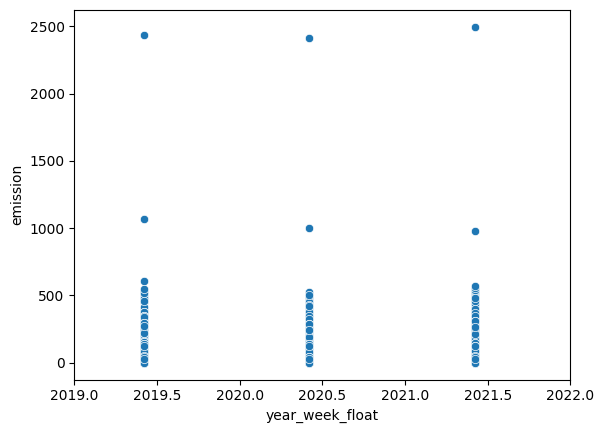

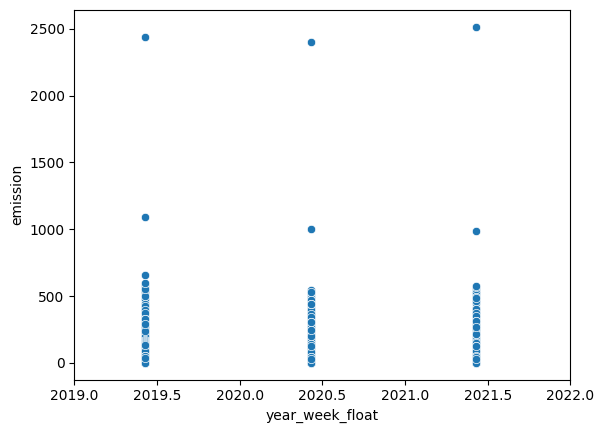

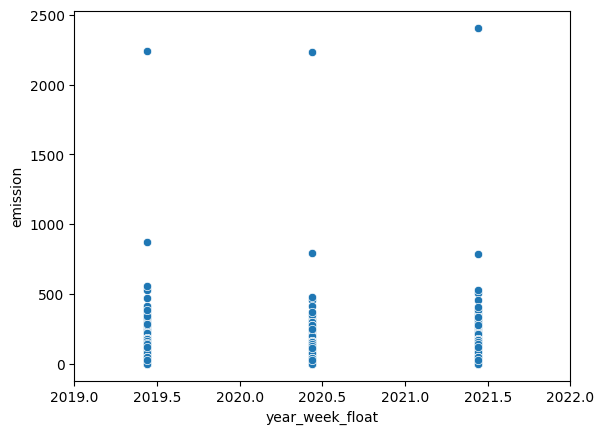

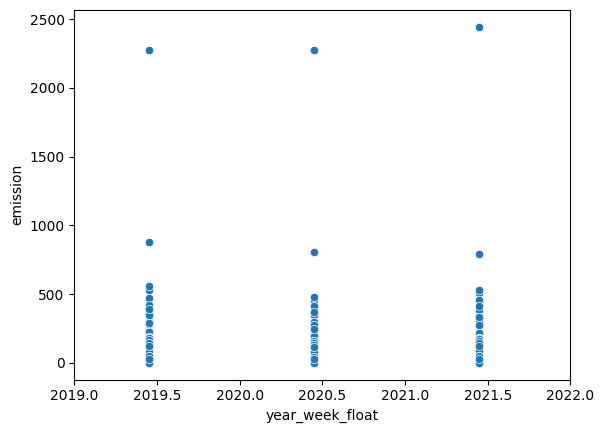

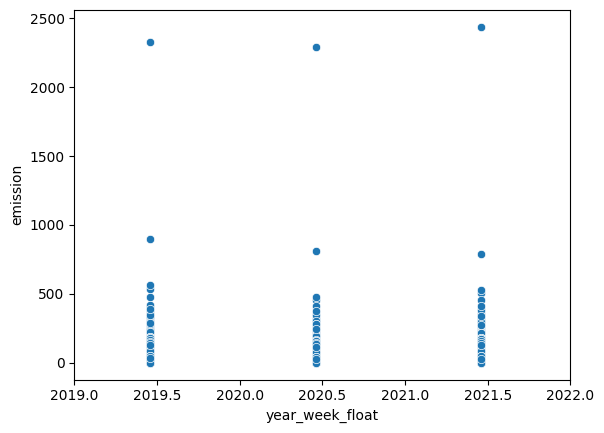

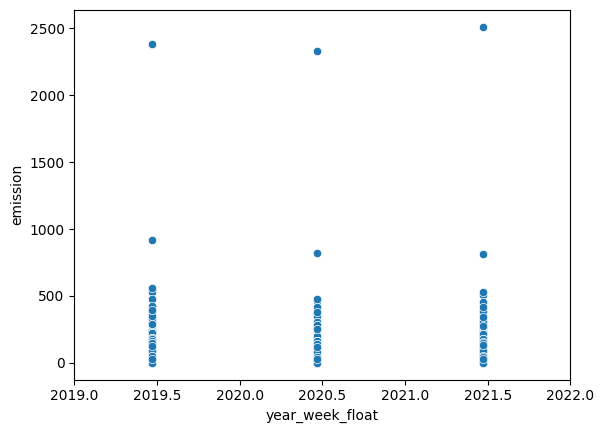

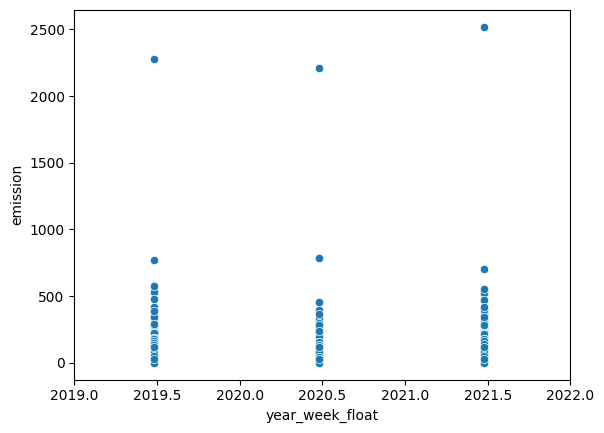

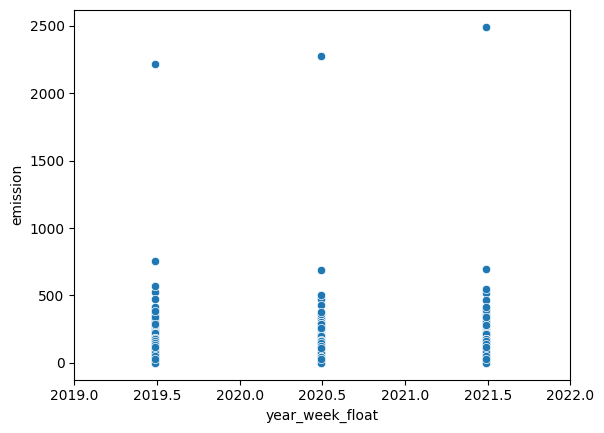

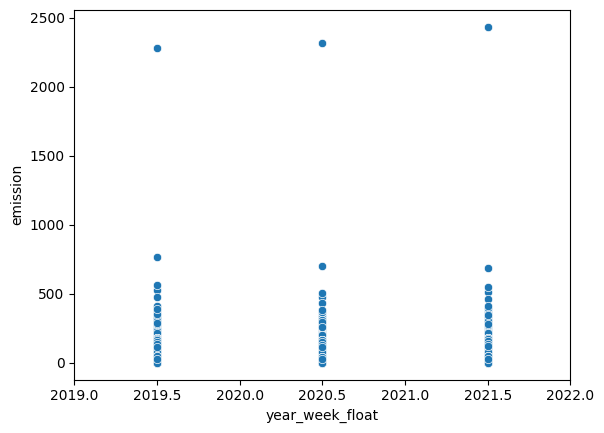

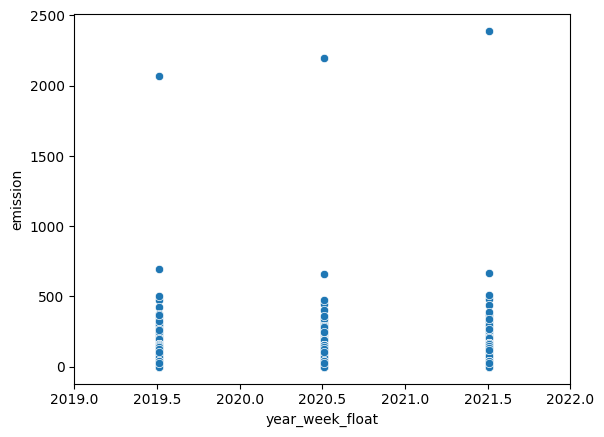

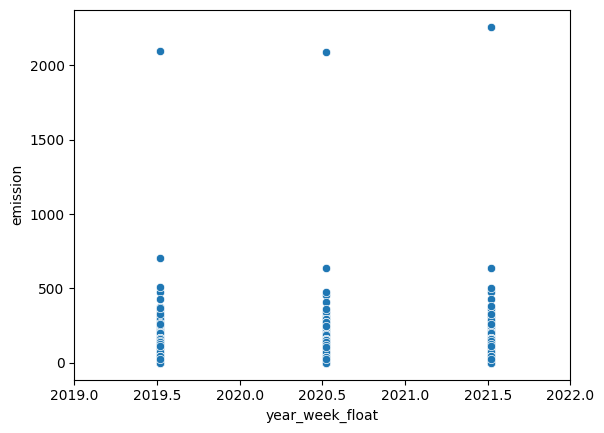

In [49]:
list_years = year_week_df['year'].unique()
list_weeks = year_week_df['week_no'].unique()
len_list_years = len(list_years)
len_list_weeks = len(list_weeks)
# years_count = 0


# Create grid of subplots
# fig, axes = plt.subplots(len_list_years, len_list_weeks,figsize=(200,200))

for week in list_weeks:
        
    # Take the subset of the dataframe
    subset = year_week_df[(year_week_df.week_no == week)]
    
    
    # Convert Integer columns to strings
    subset['year_str'] = subset['year'].astype(str)
    subset['week_no_str'] = subset['week_no'].astype(str)

    # We do this because we have completed the operation the previous step
    # We dont need this column hencefroth, so we delete it
    del subset['year']
    del subset['week_no']

    # merge the year and week_no
    subset['year_week_str'] = subset['year_str']+'.'+subset['week_no_str']
    
    # We do this because we have completed the operation the previous step
    # We dont need this column hencefroth, so we delete it
    del subset['year_str']
    del subset['week_no_str']

    # Convert the merged week and year_no
    subset['year_week_float'] = subset['year_week_str'].astype(float)

    # We do this because we have completed the operation the previous step
    # We dont need this column hencefroth, so we delete it
    del subset['year_week_str']

    # Column rearrangment 
    columns = ['year_week_float','emission']
    subset = subset[columns]

    plt.figure()
    sns.scatterplot(data = subset,
                    x='year_week_float',
                    y='emission',)
    plt.xlim(2019,2022)
#     week_count += 1
# years_count += 1



In [ ]:
train_nocovid = df[df.year == 2019 |
                   df.year == 2020 
                